In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.signal import correlate
import pyroomacoustics as pra
import soundfile as sf
from IPython.display import Audio
from scipy.fft import fft, ifft
from scipy.signal import correlate
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches


import doascripts as doa
import simscripts as sim
import plotting as pt
import measuring as meas

# MIC POSITION VARIACION

In [2]:

Mic_Pos_1 = {
    "room_dim": [5, 5, 5], 
    "rt60": 0.2,
    "mic_amount": 4,
    "mic_start": [1, 1, 2.5],
    "mic_dist": 0.1,
    "source_pos": [2.5, 2.5, 2.5],
    "fs": 48000,
    "snr":200}
#Aseguro angulo de 90° en inicio

In [57]:
sim.expand_param(Mic_Pos_1, "mic_start", [0.015,0,0], n=50,  filename = "Mic_Pos1")

{'room_dim': [5, 5, 5],
 'rt60': 0.2,
 'mic_amount': 4,
 'mic_start': [[1.0, 1, 1],
  [1.015, 1, 1],
  [1.03, 1, 1],
  [1.045, 1, 1],
  [1.06, 1, 1],
  [1.075, 1, 1],
  [1.09, 1, 1],
  [1.105, 1, 1],
  [1.12, 1, 1],
  [1.135, 1, 1],
  [1.15, 1, 1],
  [1.165, 1, 1],
  [1.18, 1, 1],
  [1.195, 1, 1],
  [1.21, 1, 1],
  [1.225, 1, 1],
  [1.24, 1, 1],
  [1.255, 1, 1],
  [1.27, 1, 1],
  [1.285, 1, 1],
  [1.3, 1, 1],
  [1.315, 1, 1],
  [1.33, 1, 1],
  [1.345, 1, 1],
  [1.3599999999999999, 1, 1],
  [1.375, 1, 1],
  [1.3900000000000001, 1, 1],
  [1.405, 1, 1],
  [1.42, 1, 1],
  [1.435, 1, 1],
  [1.45, 1, 1],
  [1.4649999999999999, 1, 1],
  [1.48, 1, 1],
  [1.495, 1, 1],
  [1.51, 1, 1],
  [1.525, 1, 1],
  [1.54, 1, 1],
  [1.555, 1, 1],
  [1.5699999999999998, 1, 1],
  [1.585, 1, 1],
  [1.6, 1, 1],
  [1.615, 1, 1],
  [1.63, 1, 1],
  [1.645, 1, 1],
  [1.66, 1, 1],
  [1.6749999999999998, 1, 1],
  [1.69, 1, 1],
  [1.705, 1, 1],
  [1.72, 1, 1],
  [1.7349999999999999, 1, 1],
  [1.75, 1, 1],
  [1.7650000

Ver si al cambiar la posición del array se mantiene estable el ángulo estimado (como debería), o si algunos métodos se degradan cuando se alejan o acercan al centro.

El angulo deberia ir aumentando a medida que el microfono empieza a acercarse al centro. serian los primeros 4 metros hasta llegar a la mitad de la sala.

Como audio se utilizará un impulso

In [58]:
x,y= doa.full_doa_pipeline("Mic_Pos1.json","Audios/imp.wav", method="classicfft", variable_param="mic_start",return_error=False)


Error with config {'room_dim': [5, 5, 5], 'rt60': 0.2, 'mic_amount': 4, 'mic_start': [4.705, 1, 1], 'mic_dist': 0.1, 'source_pos': [2.5, 2.5, 1], 'fs': 44100, 'snr': 0}: zero-size array to reduction operation maximum which has no identity
Error with config {'room_dim': [5, 5, 5], 'rt60': 0.2, 'mic_amount': 4, 'mic_start': [4.72, 1, 1], 'mic_dist': 0.1, 'source_pos': [2.5, 2.5, 1], 'fs': 44100, 'snr': 0}: zero-size array to reduction operation maximum which has no identity
Error with config {'room_dim': [5, 5, 5], 'rt60': 0.2, 'mic_amount': 4, 'mic_start': [4.734999999999999, 1, 1], 'mic_dist': 0.1, 'source_pos': [2.5, 2.5, 1], 'fs': 44100, 'snr': 0}: zero-size array to reduction operation maximum which has no identity


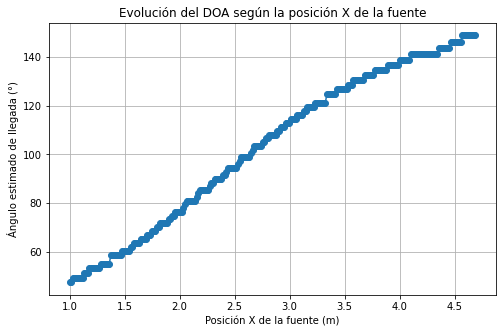

[47.56, 47.56, 49.54, 49.54, 49.54, 49.54, 49.54, 49.54, 49.54, 51.52, 51.52, 51.52, 53.35, 53.35, 53.35, 53.35, 53.35, 53.35, 53.35, 55.18, 55.18, 55.18, 55.18, 55.18, 55.18, 58.74, 58.74, 58.74, 58.74, 58.74, 58.74, 58.74, 60.46, 60.46, 60.46, 60.46, 60.46, 62.1, 62.1, 63.83, 63.83, 63.83, 63.83, 65.47, 65.47, 65.47, 65.47, 67.06, 67.06, 67.06, 68.7, 68.7, 68.7, 70.29, 70.29, 71.83, 71.83, 71.83, 71.83, 71.83, 73.42, 73.42, 74.96, 74.96, 76.48, 76.48, 76.48, 76.48, 76.48, 78.02, 79.54, 81.03, 81.03, 81.03, 81.03, 81.03, 81.03, 82.55, 84.04, 85.53, 85.53, 85.53, 85.53, 85.53, 85.53, 87.03, 88.51, 88.51, 90.0, 90.0, 90.0, 90.0, 90.0, 91.49, 91.49, 92.97, 94.47, 94.47, 94.47, 94.47, 94.47, 94.47, 95.96, 97.45, 98.97, 98.97, 98.97, 98.97, 98.97, 98.97, 100.46, 101.98, 103.52, 103.52, 103.52, 103.52, 103.52, 105.04, 105.04, 106.58, 106.58, 108.17, 108.17, 108.17, 108.17, 108.17, 109.71, 109.71, 111.3, 111.3, 111.3, 112.94, 112.94, 112.94, 114.53, 114.53, 114.53, 114.53, 116.17, 116.17, 11

In [59]:
x_coords = [pos[0] for pos in x] 
plt.figure(figsize=(8, 5))
plt.plot(x_coords, y, marker='o')
plt.xlabel("Posición X de la fuente (m)")
plt.ylabel("Ángulo estimado de llegada (°)")
plt.title("Evolución del DOA según la posición X de la fuente")
plt.grid(True)
plt.show()

print(y)

Perfecto, Automatizamos y observamos como se desempeñan los distintos algoritmos.

In [33]:
methods = [  # correlación cruzada directa en el dominio temporal
    "classicfft",   # correlación cruzada clásica vía FFT
    "phat",         # GCC con ponderación PHAT
    "scot",         # GCC con ponderación SCOT
    "roth",         # GCC con ponderación Roth         
    "ml"            # GCC con ponderación de máxima verosimilitud (ML)
]

In [35]:
results = {}  # Para guardar los ángulos por método

for method in methods:
    try:
        print(f"Ejecutando método: {method}")
        x, y = doa.full_doa_pipeline(
            "Mic_Pos1.json", 
            "Audios/imp.wav", 
            method=method, 
            variable_param="mic_start", 
            return_error=False
        )
        x_coords = [pos[0] for pos in x]
        results[method] = (x_coords, y)
    except Exception as e:
        print(f"Error con el método {method}: {e}")

Ejecutando método: classicfft
Ejecutando método: phat
Ejecutando método: scot
Ejecutando método: roth
Ejecutando método: ml


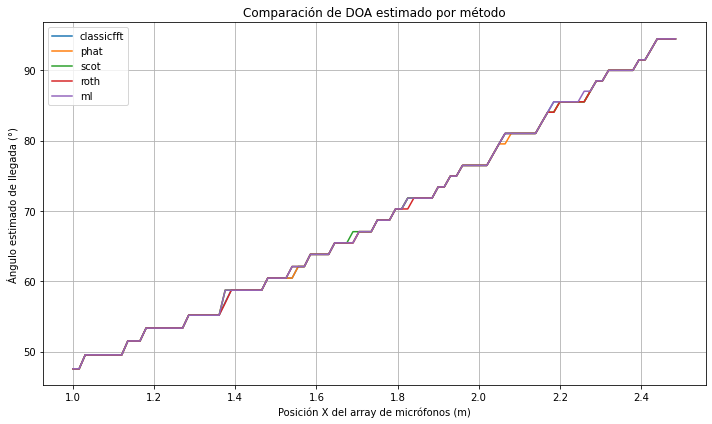

In [40]:
plt.figure(figsize=(10, 6))

for method, (x_vals, doa_vals) in results.items():
    plt.plot(x_vals, doa_vals, label=method)

plt.xlabel("Posición X del array de micrófonos (m)")
plt.ylabel("Ángulo estimado de llegada (°)")
plt.title("Comparación de DOA estimado por método")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Ahora busco graficar errores.

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Señal a usar (solo impulso)
signal_file = "imp.wav"
signal_label = "Impulso"

# Métodos a usar
methods = [
    "classicfft",
    "phat", "scot", "roth", 
    "ml"
]

# Diccionario para guardar resultados
results = {}

# Recolectar errores
all_errors = []
for method in methods:
    print(f"Procesando: {signal_label} - {method}")
    try:
        x, y = doa.full_doa_pipeline(
            "Mic_Pos1.json", 
            f"Audios/{signal_file}",
            method=method,
            variable_param="mic_start",
            return_error=True
        )
        all_errors.append(y)  # y es la lista de errores individuales
    except Exception as e:
        print(f"Error con {signal_label} - {method}: {e}")
        all_errors.append([np.nan])

results[signal_label] = all_errors


Procesando: Impulso - classicfft
Procesando: Impulso - phat
Procesando: Impulso - scot
Procesando: Impulso - roth
Procesando: Impulso - ml


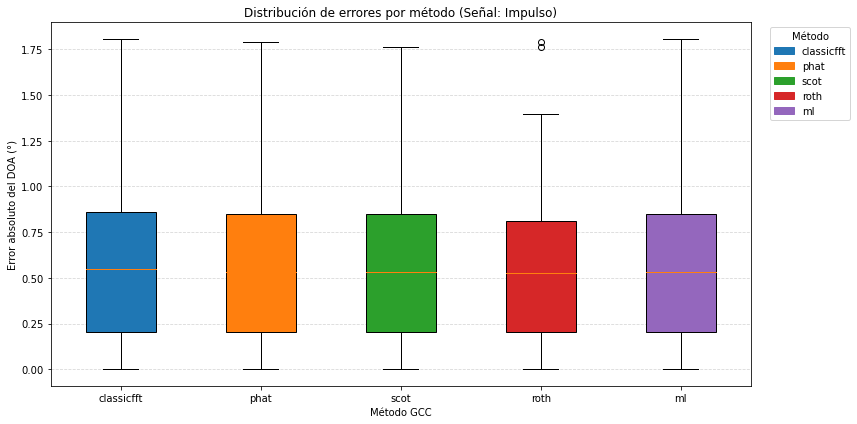

In [14]:
# Graficar boxplot

plt.figure(figsize=(12, 6))

data = results[signal_label]
positions = np.arange(len(methods))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
method_patches = []

# Crear boxplot
box = plt.boxplot(data, positions=positions, widths=0.5, patch_artist=True, showfliers=True)

# Colorear cada método distinto
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Leyenda
for i, method in enumerate(methods):
    method_patches.append(mpatches.Patch(color=colors[i], label=method))

plt.xticks(positions, methods, rotation=0)
plt.xlabel("Método GCC")
plt.ylabel("Error absoluto del DOA (°)")
plt.title("Distribución de errores por método (Señal: Impulso)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(handles=method_patches, title="Método", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Boxplot_mic_start.png", dpi=300, bbox_inches='tight')
plt.show()

metodo franco

No podés hacer boxplot con ese results porque guardás solo los promedios y desviaciones, no los errores individuales necesarios para la distribución del boxplot.

El boxplot necesita la lista completa de errores y para cada método, no un solo valor resumen.

In [32]:
# Diccionario para guardar resultados
results = {}
mean_errors = []
std_errors = []

for method in methods:
    print(f"Procesando: {signal_label} - {method}")
    try:
        x, y = doa.full_doa_pipeline(
            "Mic_Pos1.json", 
            f"Audios/{signal_file}",
            method=method,
            variable_param="mic_start",
            return_error=True
        )
        mean_errors.append(np.mean(y))
        std_errors.append(np.std(y))
    except Exception as e:
        print(f"Error con {signal_label} - {method}: {e}")
        mean_errors.append(np.nan)
        std_errors.append(np.nan)

results = {signal_label: (mean_errors, std_errors)}

Procesando: Impulso - classicfft
Procesando: Impulso - phat
Procesando: Impulso - scot
Procesando: Impulso - roth
Procesando: Impulso - ml


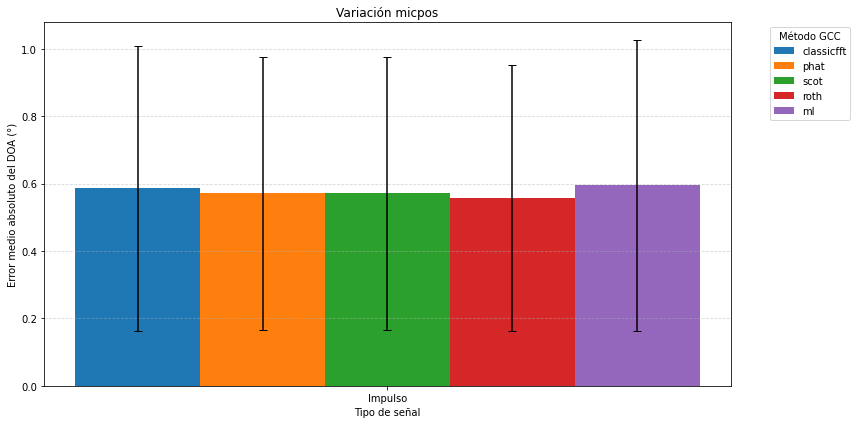

In [24]:
n_signals = 1  # solo una señal
n_methods = len(methods)
bar_width = 0.12

group_centers = np.array([0])  # posición única para la única señal
method_offsets = (np.arange(n_methods) - (n_methods - 1) / 2) * bar_width

plt.figure(figsize=(12, 6))

for i, method in enumerate(methods):
    # En results, la estructura es: results[signal_label] = (mean_errors, std_errors)
    mean_errors = results[signal_label][0]
    std_errors = results[signal_label][1]
    
    # Posición de cada barra para el método i
    bar_pos = group_centers + method_offsets[i]
    
    plt.bar(bar_pos, mean_errors[i:i+1], width=bar_width, yerr=std_errors[i:i+1], capsize=4, label=method)

# Etiqueta del eje X: un solo tick centrado
plt.xticks(group_centers, [signal_label])
plt.xlabel("Tipo de señal")
plt.ylabel("Error medio absoluto del DOA (°)")
plt.title("Variación micpos")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Método GCC", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("pos.png", dpi=300, bbox_inches='tight')

plt.show()


# DISTANCIA ENTRE MICS


In [3]:
sim.expand_param(Mic_Pos_1, "mic_dist", [0.05,0.15], n=50,  filename = "Mic_dist1")

{'room_dim': [5, 5, 5],
 'rt60': 0.2,
 'mic_amount': 4,
 'mic_start': [1, 1, 1],
 'mic_dist': [0.05,
  0.05101,
  0.05202,
  0.05303,
  0.05404,
  0.055051,
  0.056061,
  0.057071,
  0.058081,
  0.059091,
  0.060101,
  0.061111,
  0.062121,
  0.063131,
  0.064141,
  0.065152,
  0.066162,
  0.067172,
  0.068182,
  0.069192,
  0.070202,
  0.071212,
  0.072222,
  0.073232,
  0.074242,
  0.075253,
  0.076263,
  0.077273,
  0.078283,
  0.079293,
  0.080303,
  0.081313,
  0.082323,
  0.083333,
  0.084343,
  0.085354,
  0.086364,
  0.087374,
  0.088384,
  0.089394,
  0.090404,
  0.091414,
  0.092424,
  0.093434,
  0.094444,
  0.095455,
  0.096465,
  0.097475,
  0.098485,
  0.099495,
  0.100505,
  0.101515,
  0.102525,
  0.103535,
  0.104545,
  0.105556,
  0.106566,
  0.107576,
  0.108586,
  0.109596,
  0.110606,
  0.111616,
  0.112626,
  0.113636,
  0.114646,
  0.115657,
  0.116667,
  0.117677,
  0.118687,
  0.119697,
  0.120707,
  0.121717,
  0.122727,
  0.123737,
  0.124747,
  0.125758,
  0

In [4]:
x,y= doa.full_doa_pipeline("Mic_dist1.json","Audios/imp.wav", method="classicfft", variable_param="mic_dist",return_error=False)


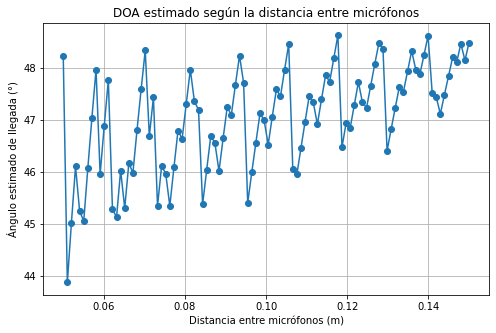

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o')
plt.xlabel("Distancia entre micrófonos (m)")
plt.ylabel("Ángulo estimado de llegada (°)")
plt.title("DOA estimado según la distancia entre micrófonos")
plt.grid(True)
plt.show()

In [52]:
results_doa = {}  # Para guardar ángulos por método

for method in methods:
    try:
        print(f"Ejecutando método: {method}")
        x, y = doa.full_doa_pipeline(
            "Mic_Dist1.json", 
            f"Audios/{signal_file}", 
            method=method, 
            variable_param="mic_dist", 
            return_error=False
        )
        results_doa[method] = (x, y)
    except Exception as e:
        print(f"Error con el método {method}: {e}")


Ejecutando método: classicfft
Ejecutando método: phat
Ejecutando método: scot
Ejecutando método: roth
Ejecutando método: ml


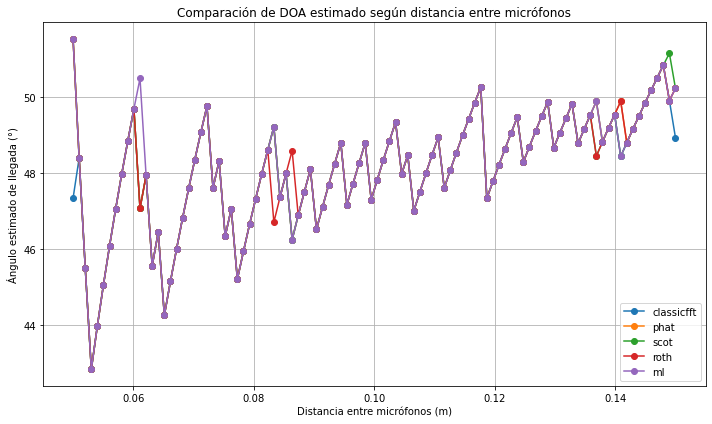

In [53]:
plt.figure(figsize=(10, 6))
for method, (x_vals, doa_vals) in results_doa.items():
    plt.plot(x_vals, doa_vals, marker='o', label=method)

plt.xlabel("Distancia entre micrófonos (m)")
plt.ylabel("Ángulo estimado de llegada (°)")
plt.title("Comparación de DOA estimado según distancia entre micrófonos")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("DOA_vs_micdist.png", dpi=300, bbox_inches='tight')
plt.show()

Procesando errores: Impulso - classicfft
Procesando errores: Impulso - phat
Procesando errores: Impulso - scot
Procesando errores: Impulso - roth
Procesando errores: Impulso - ml


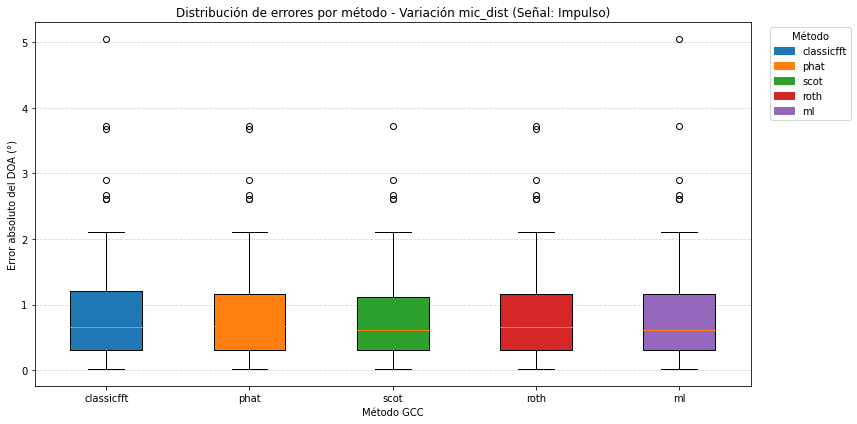

In [54]:
# Diccionario para guardar errores
results_errors = {}
all_errors = []

for method in methods:
    print(f"Procesando errores: {signal_label} - {method}")
    try:
        x, y = doa.full_doa_pipeline(
            "Mic_Dist1.json", 
            f"Audios/{signal_file}",
            method=method,
            variable_param="mic_dist",
            return_error=True
        )
        all_errors.append(y)  # y = lista de errores por distancia
    except Exception as e:
        print(f"Error con {signal_label} - {method}: {e}")
        all_errors.append([np.nan])

results_errors[signal_label] = all_errors

# Boxplot de errores
plt.figure(figsize=(12, 6))

data = results_errors[signal_label]
positions = np.arange(len(methods))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
method_patches = []

box = plt.boxplot(data, positions=positions, widths=0.5, patch_artist=True, showfliers=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Leyenda
for i, method in enumerate(methods):
    method_patches.append(mpatches.Patch(color=colors[i], label=method))

plt.xticks(positions, methods)
plt.xlabel("Método GCC")
plt.ylabel("Error absoluto del DOA (°)")
plt.title("Distribución de errores por método - Variación mic_dist (Señal: Impulso)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(handles=method_patches, title="Método", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Boxplot_micdist.png", dpi=300, bbox_inches='tight')
plt.show()

# Cantidad de MICS

In [12]:
sim.expand_param(Mic_Pos_1, "mic_amount", [2,30], n=29,  filename = "Mic_amount1")

{'room_dim': [5, 5, 5],
 'rt60': 0.2,
 'mic_amount': [2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0],
 'mic_start': [1, 1, 1],
 'mic_dist': 0.1,
 'source_pos': [2.5, 2.5, 1],
 'fs': 44100,
 'snr': 0}

In [9]:
methods = [
    "classicfft",
    "phat", "scot", "roth", 
    "ml"
]

results = {}  # Para guardar los ángulos por método

for method in methods:
    try:
        print(f"Ejecutando método: {method}")
        x, y = doa.full_doa_pipeline(
            "Mic_amount1.json", 
            "Audios/imp.wav", 
            method=method, 
            variable_param="mic_amount", 
            return_error=False
        )

        # Asegurarse de que x e y sean listas
        if not isinstance(x, (list, np.ndarray)):
            x = [x]
        if not isinstance(y, (list, np.ndarray)):
            y = [y]

        results[method] = (x, y)

    except Exception as e:
        print(f"Error con el método {method}: {e}")

Ejecutando método: classicfft
Skipping config with insufficient microphones: mic_amount=1
Ejecutando método: phat
Skipping config with insufficient microphones: mic_amount=1
Ejecutando método: scot
Skipping config with insufficient microphones: mic_amount=1
Ejecutando método: roth
Skipping config with insufficient microphones: mic_amount=1
Ejecutando método: ml
Skipping config with insufficient microphones: mic_amount=1


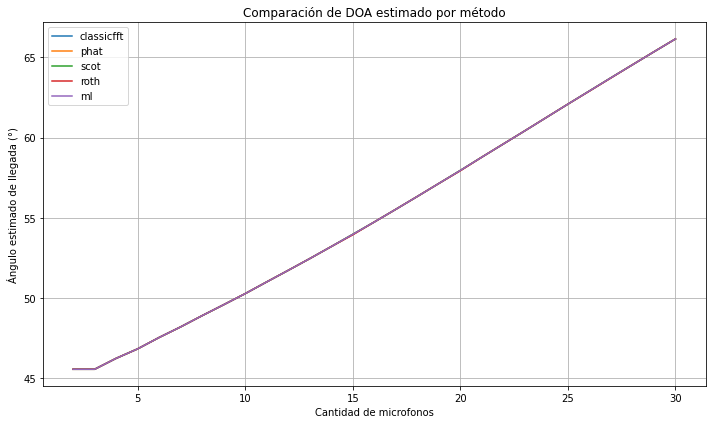

In [11]:
plt.figure(figsize=(10, 6))

for method, (x_vals, doa_vals) in results.items():
    plt.plot(x_vals, doa_vals, label=method)

plt.xlabel("Cantidad de microfonos")
plt.ylabel("Ángulo estimado de llegada (°)")
plt.title("Comparación de DOA estimado por método")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

BOXPLOT

In [69]:
# Señal a usar (solo impulso)
signal_file = "imp.wav"
signal_label = "Impulso"

# Métodos a usar
methods = [
    "classicfft",
    "phat", "scot", "roth", 
    "ml"
]

# Diccionario para guardar resultados
results = {}

# Recolectar errores
all_errors = []
for method in methods:
    print(f"Procesando: {signal_label} - {method}")
    try:
        x, y = doa.full_doa_pipeline(
            "Mic_amount1.json", 
            f"Audios/{signal_file}",
            method=method,
            variable_param="mic_amount",
            return_error=True
        )
        all_errors.append(y)  # y es la lista de errores individuales
    except Exception as e:
        print(f"Error con {signal_label} - {method}: {e}")
        all_errors.append([np.nan])

results[signal_label] = all_errors


Procesando: Impulso - classicfft
Skipping config with insufficient microphones: mic_amount=1
Procesando: Impulso - phat
Skipping config with insufficient microphones: mic_amount=1
Procesando: Impulso - scot
Skipping config with insufficient microphones: mic_amount=1
Procesando: Impulso - roth
Skipping config with insufficient microphones: mic_amount=1
Procesando: Impulso - ml
Skipping config with insufficient microphones: mic_amount=1


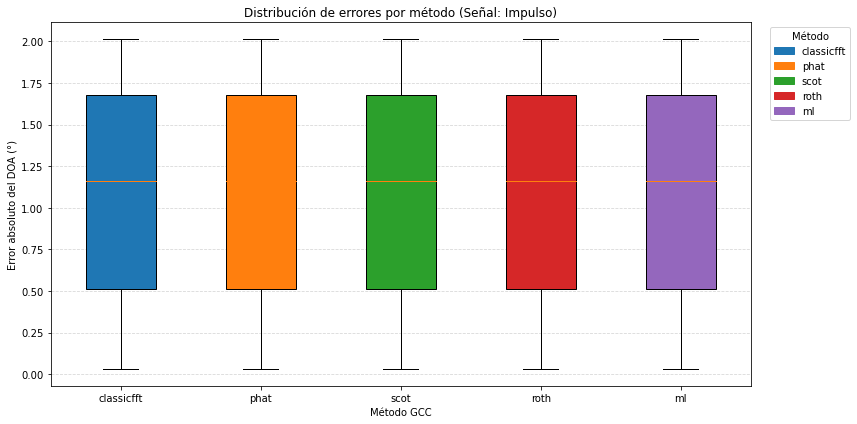

In [70]:
# Graficar boxplot

plt.figure(figsize=(12, 6))

data = results[signal_label]
positions = np.arange(len(methods))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
method_patches = []

# Crear boxplot
box = plt.boxplot(data, positions=positions, widths=0.5, patch_artist=True, showfliers=True)

# Colorear cada método distinto
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Leyenda
for i, method in enumerate(methods):
    method_patches.append(mpatches.Patch(color=colors[i], label=method))

plt.xticks(positions, methods, rotation=0)
plt.xlabel("Método GCC")
plt.ylabel("Error absoluto del DOA (°)")
plt.title("Distribución de errores por método (Señal: Impulso)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(handles=method_patches, title="Método", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Boxplot_mic_amount.png", dpi=300, bbox_inches='tight')
plt.show()

# Elevacion de fuente

In [ ]:
sim.expand_param(Mic_Pos_1, "source_pos", [(0,0,0),(0,0,5)], n=50,  filename = "Source_Pos1")

In [ ]:
resultspos = {}  # Para guardar los ángulos por método

for method in methods:
    try:
        print(f"Ejecutando método: {method}")
        x, y = doa.full_doa_pipeline(
            "Source_Pos1.json", 
            "Audios/imp.wav", 
            method=method, 
            variable_param="source_pos", 
            return_error=False
        )

        # Asegurarse de que x e y sean listas
        if not isinstance(x, (list, np.ndarray)):
            x = [x]
        if not isinstance(y, (list, np.ndarray)):
            y = [y]

        resultspos[method] = (x, y)

    except Exception as e:
        print(f"Error con el método {method}: {e}")

In [ ]:
plt.figure(figsize=(10, 6))

for method, (x_vals, doa_vals) in results.items():
    plt.plot(x_vals, doa_vals, label=method)

plt.xlabel("Elevación de fuente")
plt.ylabel("Ángulo estimado de llegada (°)")
plt.title("Comparación de DOA estimado por método")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

BOXPLOT

In [ ]:
# Señal a usar (solo impulso)
signal_file = "imp.wav"
signal_label = "Impulso"

# Métodos a usar
methods = [
    "classicfft",
    "phat", "scot", "roth", 
    "ml"
]

# Diccionario para guardar resultados
results = {}

# Recolectar errores
all_errors = []
for method in methods:
    print(f"Procesando: {signal_label} - {method}")
    try:
        x, y = doa.full_doa_pipeline(
            "Source_Pos1.json", 
            f"Audios/{signal_file}",
            method=method,
            variable_param="source_pos",
            return_error=True
        )
        all_errors.append(y)  # y es la lista de errores individuales
    except Exception as e:
        print(f"Error con {signal_label} - {method}: {e}")
        all_errors.append([np.nan])

results[signal_label] = all_errors


In [ ]:
# Graficar boxplot

plt.figure(figsize=(12, 6))

data = results[signal_label]
positions = np.arange(len(methods))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
method_patches = []

# Crear boxplot
box = plt.boxplot(data, positions=positions, widths=0.5, patch_artist=True, showfliers=True)

# Colorear cada método distinto
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Leyenda
for i, method in enumerate(methods):
    method_patches.append(mpatches.Patch(color=colors[i], label=method))

plt.xticks(positions, methods, rotation=0)
plt.xlabel("Método GCC")
plt.ylabel("Error absoluto del DOA (°)")
plt.title("Distribución de errores por método (Señal: Impulso)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(handles=method_patches, title="Método", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Source_pos_1.png", dpi=300, bbox_inches='tight')
plt.show()